In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df =  pd.read_csv("D:\Py Django\DataScience\Classification\Decision Tree\Classification\employee_attrition_dataset_900.csv")
df

,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance,attrition
0,23,male,Tech,Master,24,72618,married,yes,good,0
1,49,male,Tech,Master,1,133260,single,yes,poor,0
2,55,female,Sales,Master,33,145733,married,no,good,0
3,59,male,Tech,High School,27,59910,married,no,good,0
4,38,female,Tech,Bachelor,23,20311,married,yes,good,0
...,...,...,...,...,...,...,...,...,...,...
895,54,female,Sales,PhD,4,126298,married,no,excellent,0
896,57,male,Operations,High School,16,59522,single,yes,good,0
897,40,male,Tech,Bachelor,23,131855,married,no,poor,1
898,25,female,Tech,Bachelor,0,95018,married,yes,average,0


In [3]:
label_encoders = {}
for column in df.columns[:-1]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance,attrition
0,2,1,4,2,24,345,0,1,2,0
1,28,1,4,2,1,771,1,1,3,0
2,34,0,3,2,33,869,0,0,2,0
3,38,1,4,1,27,271,0,0,2,0
4,17,0,4,0,23,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
895,33,0,3,3,4,719,0,0,1,0
896,36,1,2,1,16,266,1,1,2,0
897,19,1,4,0,23,759,0,0,3,1
898,4,0,4,0,0,513,0,1,0,0


In [4]:
x = df.drop('attrition',axis=1)
y = df['attrition']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [6]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=40)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
x_predict = model.predict(x_test)
x_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [8]:
accuracy = accuracy_score(x_predict,y_test)
print(f"Accuracy Score : {accuracy * 100:.2f}%")

Accuracy Score : 86.11%


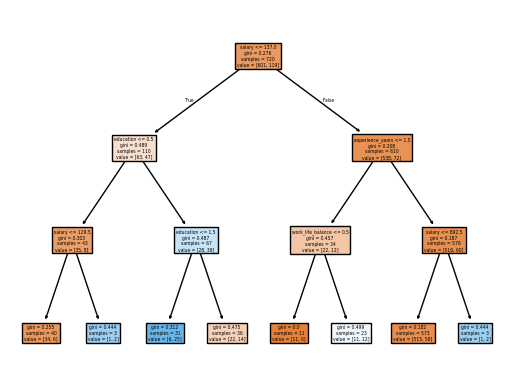

In [9]:
plt.Figure(figsize=(10,13))
plot_tree(model,feature_names=['age','gender','department','education','experience_years','salary','marital_status','overtime','work_life_balance'],filled=True)
plt.show()

In [10]:
new_data = np.array([[20,0,3,1,35,100,0,0,10]])

prediction = model.predict(new_data)
print("not posible to leave" if prediction[0] == 1 else "posible to leave")


not posible to leave


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
